In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 예제 2.7의 재무제표 API를 활용하여 수집한 데이터
samsung_revenue = pd.read_csv("./data/삼성전자_분기별_매출액.csv")
samsung_revenue = samsung_revenue.sort_values('value', ascending= False)
samsung_revenue

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\USER\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
0,67404652000000,2023-Q3
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2


In [2]:
# 비어 있는 figure 객체 생성 (Axes 객체 없음)
fig = plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


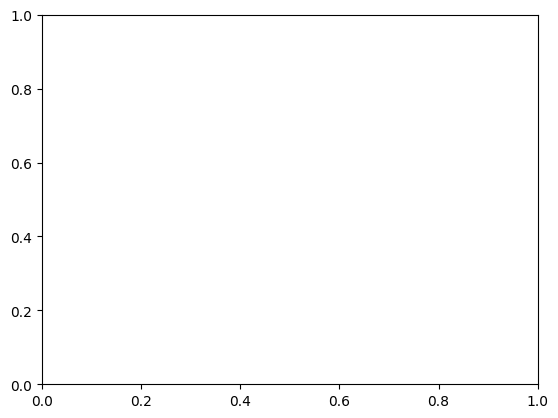

In [3]:
# figure 객체 1개, Axes 객체 1개 
fig, axe = plt.subplots()
print(fig)
print(axe)

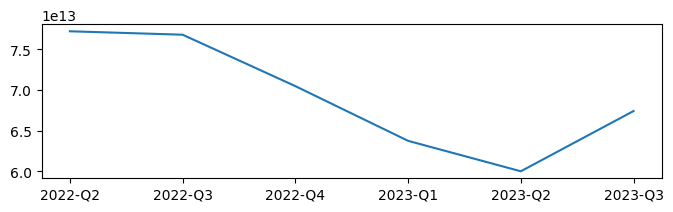

In [4]:
# axe 객체에 차트 추가
fig, axe = plt.subplots(figsize=(8, 2))
axe.plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

Figure(640x480)
[<Axes: > <Axes: >]


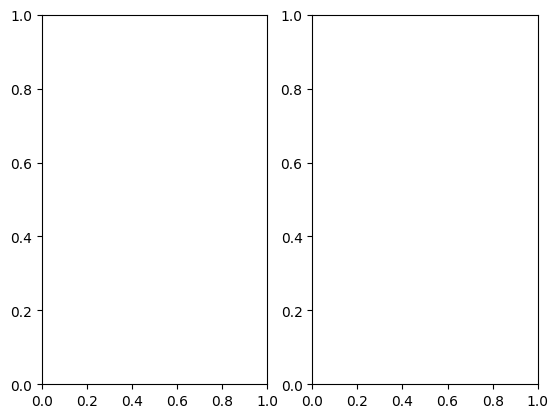

In [5]:
# figure 객체 1개, Axes 객체 2개 (1x2 grid)
fig, axes = plt.subplots(1, 2)
print(fig)
print(axes)

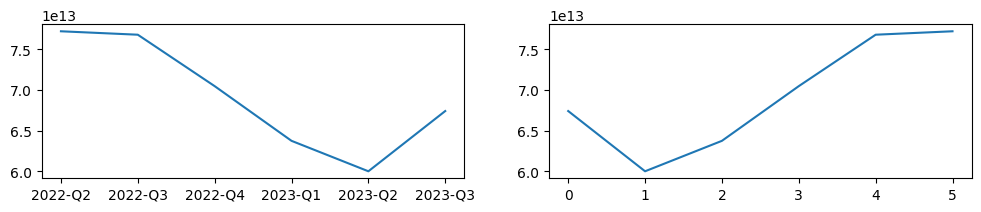

In [21]:
# axe 객체에 차트 추가
fig, axes = plt.subplots(1, 2, figsize=(12, 2))
axes[0].plot(samsung_revenue['quarter'], samsung_revenue['value'])
samsung_revenue['value'].plot(ax=axes[1])
plt.show()

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


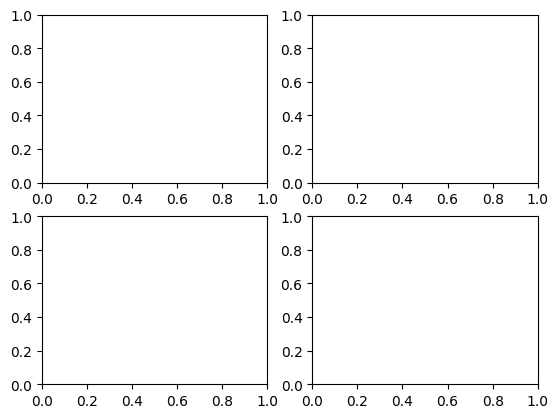

In [7]:
# figure 객체 1개, Axes 객체 4개 (2x2 grid)
fig, axes = plt.subplots(2, 2)
print(fig)
print(axes)

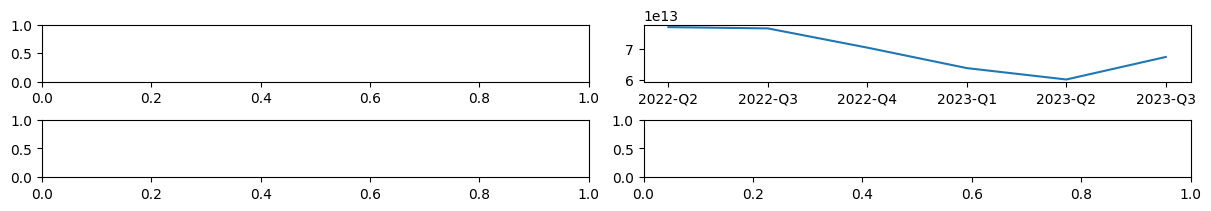

In [15]:
# axe 객체에 차트 추가
fig, axes = plt.subplots(2, 2, figsize=(12, 2), constrained_layout=True)
axes[0, 1].plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

Figure(640x480)
{'top_left': <Axes: label='top_left'>, 'right': <Axes: label='right'>, 'bottom_left': <Axes: label='bottom_left'>}


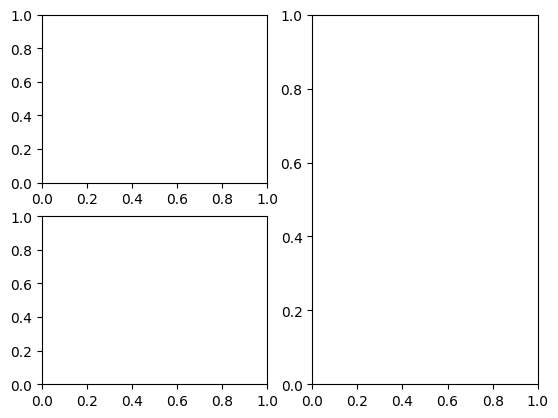

In [16]:
# figure 객체 1개, Axes 객체 3개 (왼쪽 2개, 오른쪽 1개)
fig, axes = plt.subplot_mosaic([['top_left', 'right'],
                               ['bottom_left', 'right']])
print(fig)
print(axes)

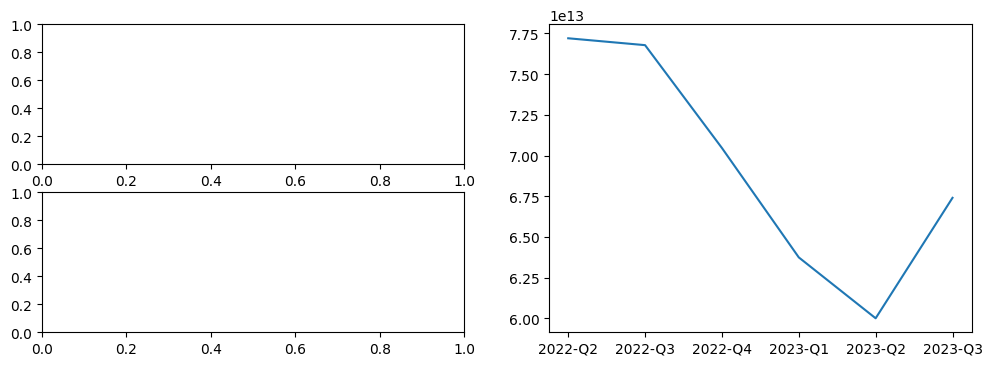

In [20]:
# axe 객체에 차트 추가
fig, axes = plt.subplot_mosaic([['top_left', 'right'],
                               ['bottom_left', 'right']],
                               figsize=(12, 4))
axes['right'].plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

In [4]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# .data 데이터를 를 확인
from glob import glob
glob('./data/*.xlsx')[0]
df2 = pd.read_excel(glob('./data/*.xlsx')[0])
# 시군군 나누기

def split_si(x):
    lastindex = None
    for idx, i in enumerate(x):
        if i == '시':
            lastindex = idx
    if lastindex:
        return x[:lastindex+1]
    else: 
        return x
    
def split_gu(x):
    lastindex = None
    for idx, i in enumerate(x):
        if i == '시':
            lastindex = idx
    if lastindex:
        return x[lastindex+1:]
    else: 
        return x    

df2['시'] = df2['구분'].apply(split_si)
df2['군'] = df2['구분'].apply(split_gu)
df3 = df2.drop(columns=['구분'])
df3.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,시,군
0,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828,수원시,장안구
1,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653,수원시,권선구
2,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311,수원시,팔달구
3,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836,수원시,영통구
4,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932,성남시,수정구


In [5]:
df4 = df3.groupby('시').sum().iloc[:,:-1]
df4.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
시,,,,,,,,,,,
가평군,55698,57108,57564,58890,59358,60794,61017,61213,62008,62448,62973
고양시,924839,938831,938784,950115,961239,969916,990571,1006154,1027546,1039684,1041983
과천시,62291,69477,72049,72279,71955,71068,70578,70156,68946,63778,57527
광명시,313019,310501,314257,343982,355226,355560,353100,348560,344978,339484,332790
광주시,229319,234777,238583,249789,265222,275656,286699,298858,312579,327723,345947


In [6]:
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
# font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

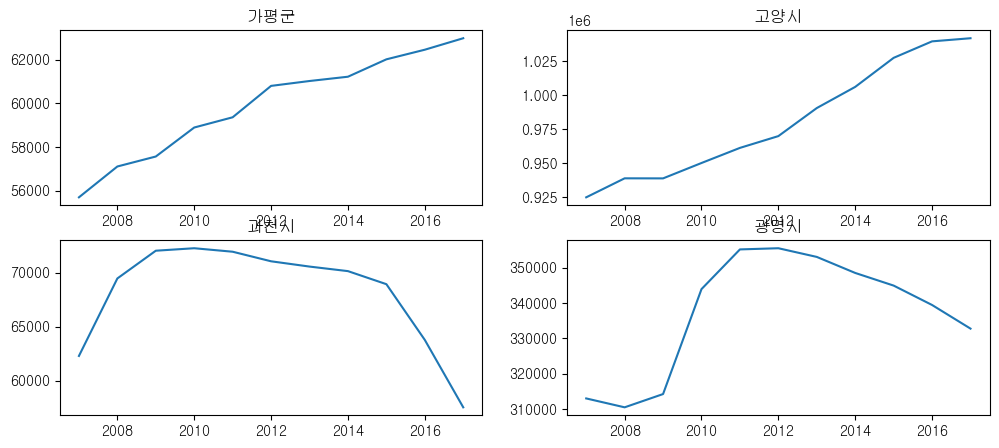

In [7]:
fig,axes = plt.subplots(2,2,figsize=(12,5))
axes[0,0].plot(df4.columns, df4.iloc[0].values)
axes[0,0].set_title('가평군')

axes[0,1].plot(df4.columns, df4.iloc[1].values)
axes[0,1].set_title('고양시')

axes[1,0].plot(df4.columns, df4.iloc[2].values)
axes[1,0].set_title('과천시')

axes[1,1].plot(df4.columns, df4.iloc[3].values)
axes[1,1].set_title('광명시')
plt.show()

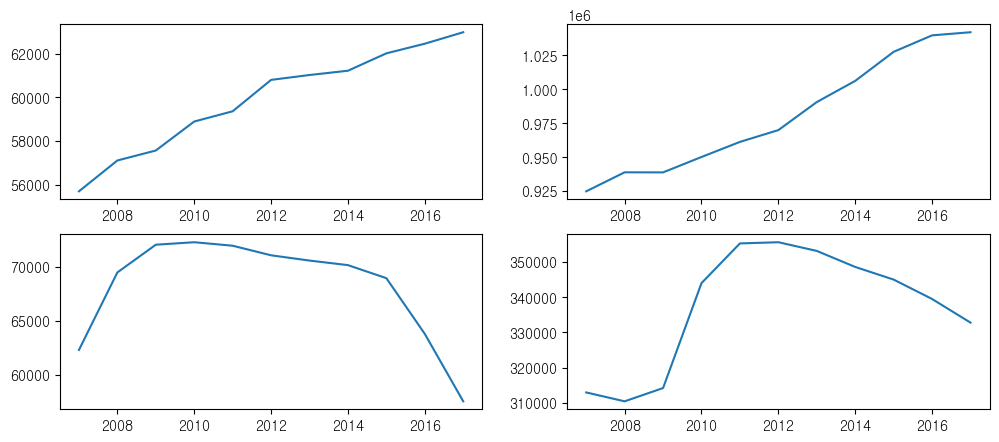

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1).plot(df4.columns,df4.iloc[0].values)
plt.subplot(2,2,2).plot(df4.columns,df4.iloc[1].values)
plt.subplot(2,2,3).plot(df4.columns,df4.iloc[2].values)
plt.subplot(2,2,4).plot(df4.columns,df4.iloc[3].values)
plt.show()

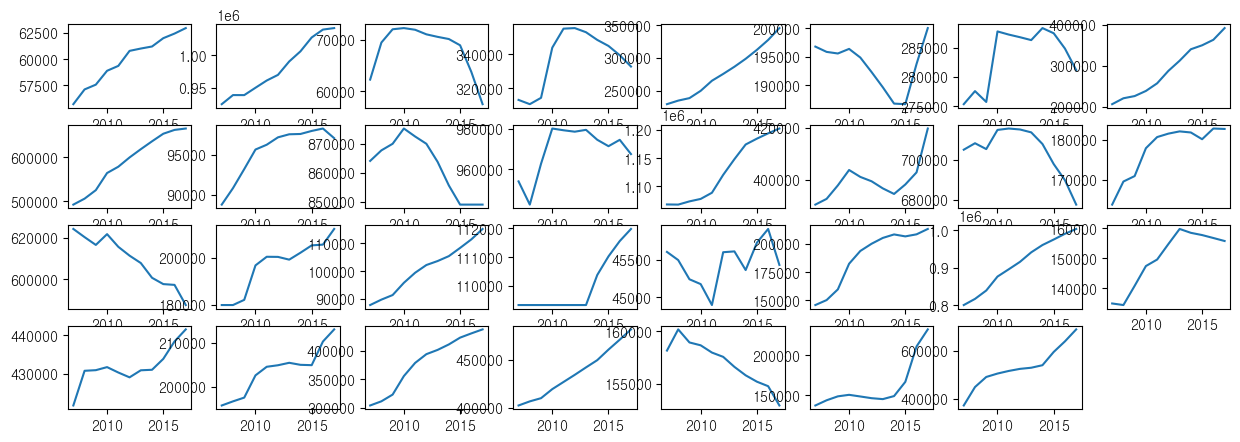

In [11]:
row = 4
if len(df4) % row != 0:
    col = (len(df4) // row) + 1
else:
    col = len(df4) // row

plt.figure(figsize=(15,5))
for i in range(len(df4)):
    plt.subplot(row,col,i+1).plot(df4.columns,df4.iloc[i])

In [12]:
import pandas as pd 
url = " https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv"
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'Sex':"Gender"})
titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

![alt text](image.png)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


<Axes: >

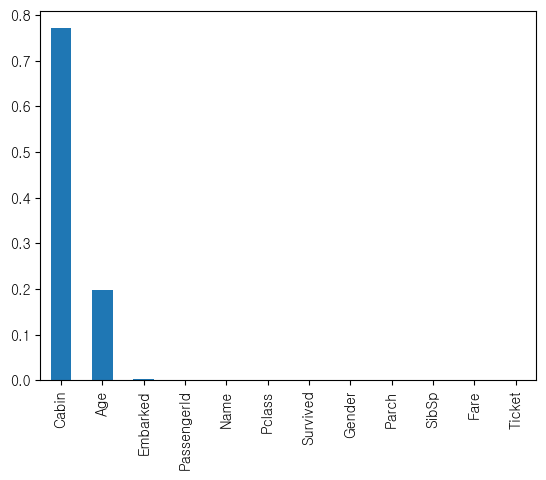

In [27]:
# null check
titanic.isnull().mean().sort_values(ascending= False).plot(kind='bar')

In [28]:
titanic.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Gender         0.000000
Parch          0.000000
SibSp          0.000000
Fare           0.000000
Ticket         0.000000
dtype: float64

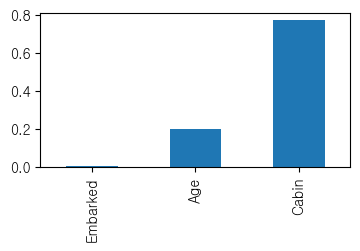

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
temp = titanic.isna().mean() 
temp [temp > 0].sort_values().plot(kind = 'bar')
plt.show()


In [34]:
%pip install missingno

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.5 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.3/38.5 MB 778.2 kB/s eta 0:00:48
   - -------------------------------------- 1.3/38.5 MB 778.2 kB/s eta 0:00:48
   - -------------------------------------- 1.6/38.5 MB 759.0 kB/s eta 0:00:49
   -- ------------------------------------- 2.6/38.5 MB 1.2 MB/s eta 0:00:31
   --- ------------------------------------ 3.7/38.5 MB 1.5 MB/s eta 0:00:23
   ---- ----------------------------------- 4.7/38.5 MB 1.8 MB/s eta 0:00:19


<Axes: >

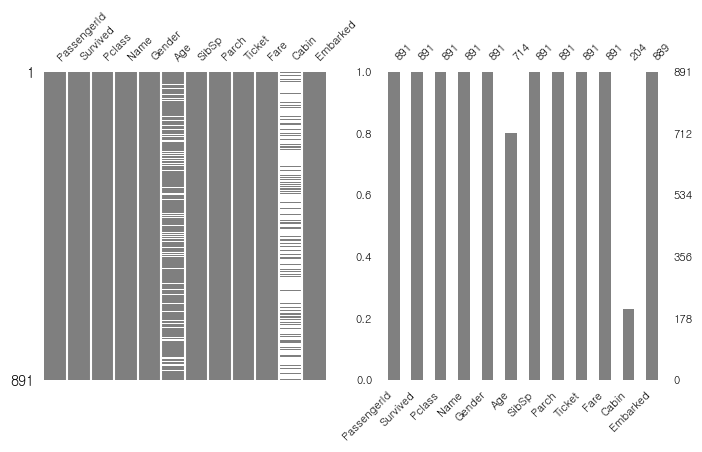

In [39]:
import missingno as msno
fig, axes = plt.subplots(1,2,figsize=(8,4))
msno.matrix(df=titanic,figsize=(4,4),fontsize=8, color=(0.5,0.5,0.5), ax= axes[0], sparkline=False)
msno.bar(df=titanic,figsize=(4,4), fontsize=8, color=(0.5,0.5,0.5), ax= axes[1])
# msno.matrix(df=titanic, figsize=(4,4), fontsize = 8, color = (0.5,0.5,0.6))

In [42]:
# age컬럼의 결측치가 있는 모든 row를 출력
titanic[titanic['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [43]:
missing_df = titanic[titanic.drop(columns=['Cabin']).isna().any(axis = 1)]
missing_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# embakred 가 결측치인 row 데이터를 출력 
titanic[titanic['Embarked'].isna()]


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [45]:
k = 3
df_lists = []
for i in titanic[titanic.Embarked.isna()].index:
    df_lists.append(titanic.loc[i-k : i+k])

pd.concat(df_lists)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


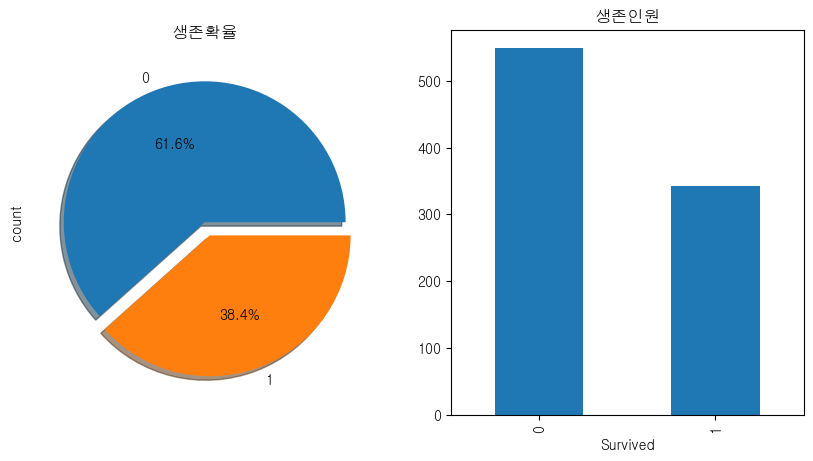

In [46]:
# 생존유무  pie 그래프
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('생존확율')
titanic.Survived.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode = [0,0.1],ax=ax[0])

ax[1].set_title('생존인원')
titanic.Survived.value_counts().plot(kind='bar',ax=ax[1])
plt.show()

In [48]:
titanic.groupby('Pclass')[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [50]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins = True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [51]:
#seaborn 
import seaborn as sns


<Axes: xlabel='Gender', ylabel='count'>

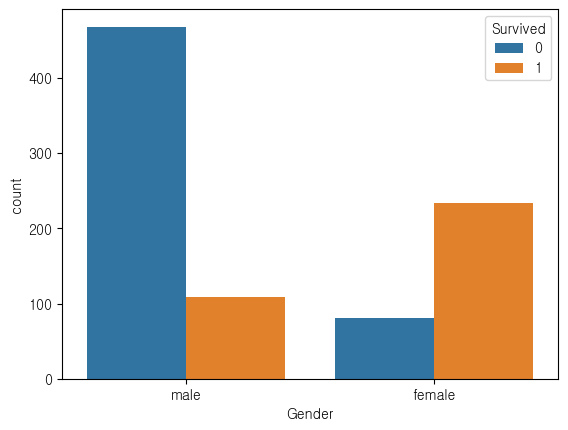

In [58]:
sns.countplot(data = titanic, x= 'Gender' , hue= 'Survived')

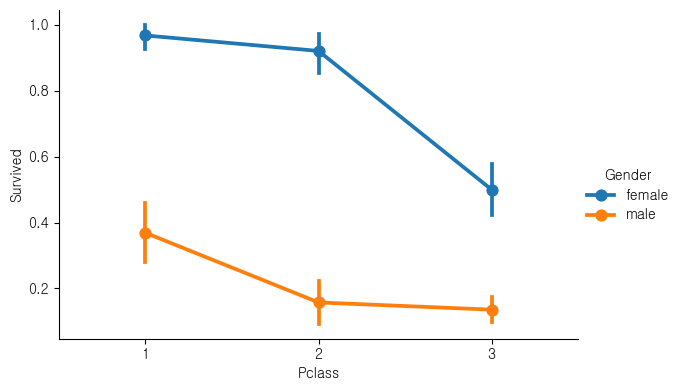

In [ ]:
# 선실등급별 , 성별에 따라서 생존확률이 높다는 것을 알 수 있음
# 두 특성을 한꺼번에 비교하는 시각화 툴
# factorplot
sns.catplot(data = titanic, x = 'Pclass', y='Survived',hue ='Gender',kind='point', height = 4, aspect=1.5)
plt.show()

In [68]:
# 나이가 가장 낮은 승객, 높은 승객 , 평균나이 

titanic.Age.max(),titanic.Age.min(), titanic.Age.mean()

(np.float64(80.0), np.float64(0.42), np.float64(29.69911764705882))

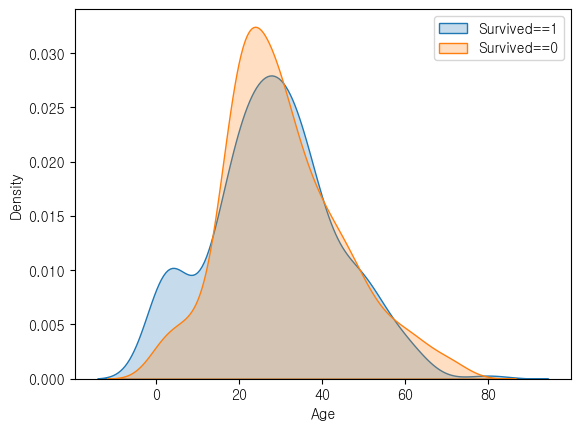

In [ ]:
sns.kdeplot(
    data = titanic[titanic.Survived == 1], x='Age', label = 'Survived==1',fill=True
)

sns.kdeplot(
    data = titanic[titanic.Survived == 0], x='Age', label = 'Survived==0',fill=True
)
plt.legend(loc='best')
plt.show()

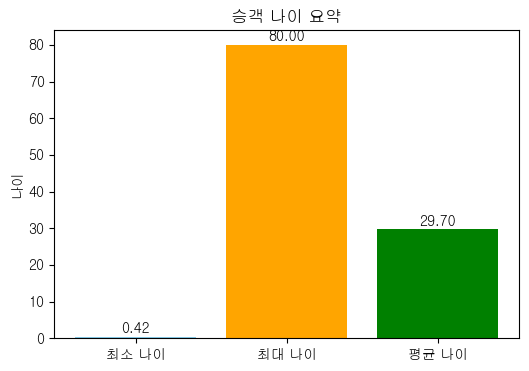

In [67]:
import matplotlib.pyplot as plt

small = titanic['Age'].min()
large = titanic['Age'].max()
average = titanic['Age'].mean()

values = [small, large, average]
labels = ['최소 나이', '최대 나이', '평균 나이']

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=['skyblue','orange','green'])

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}", ha='center')

plt.title("승객 나이 요약")
plt.ylabel("나이")
plt.show()


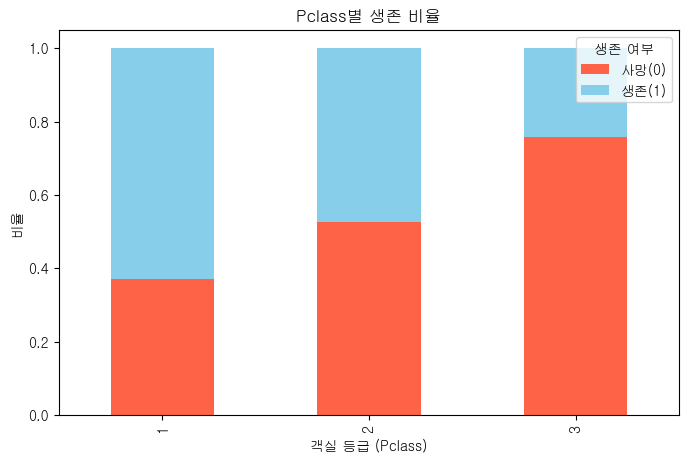

In [72]:

pclass_surv = titanic.groupby(['Pclass','Survived']).size().unstack()
pclass_ratio = pclass_surv.div(pclass_surv.sum(axis=1), axis=0)

pclass_ratio.plot(kind='bar', stacked=True, figsize=(8,5),
                  color=['tomato','skyblue'])

plt.title("Pclass별 생존 비율")
plt.xlabel("객실 등급 (Pclass)")
plt.ylabel("비율")
plt.legend(title="생존 여부", labels=['사망(0)','생존(1)'])
plt.show()


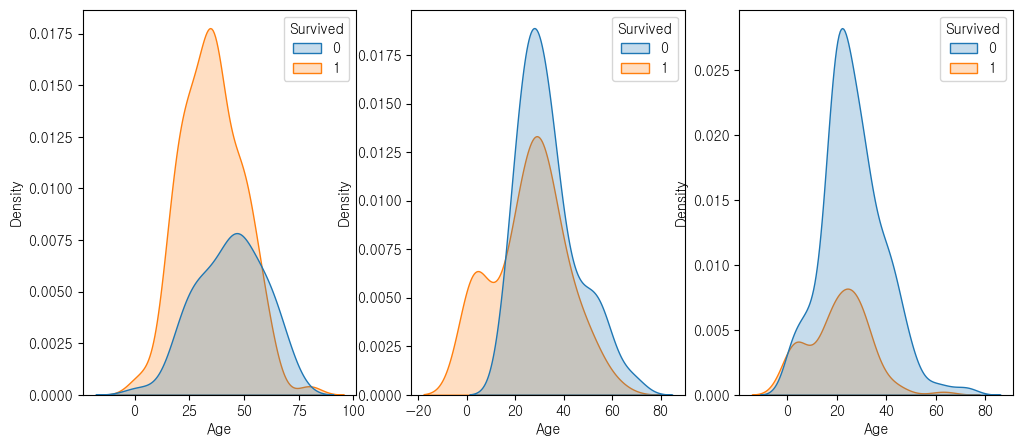

In [ ]:
# 위의 표를 응용해서  Pclass별로 생존유무에대한 시각화
f, ax = plt.subplots(1,3,figsize=(12,5))
ax[0].set_title('1등석')
ax[1].set_title
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[0]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[1]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[2]
)
plt.show()

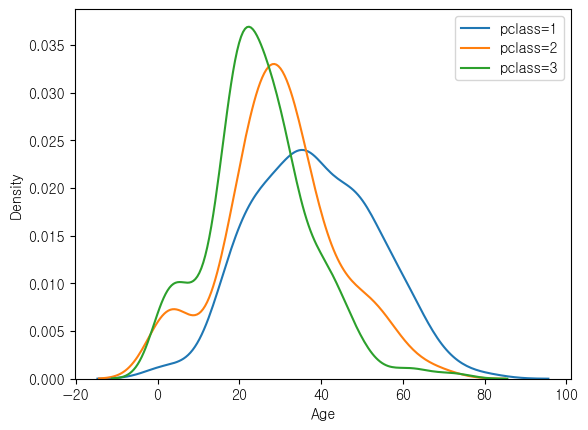

In [74]:
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age',label = 'pclass=1'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age',label = 'pclass=2'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age',label = 'pclass=3'
)
plt.legend()
plt.show()

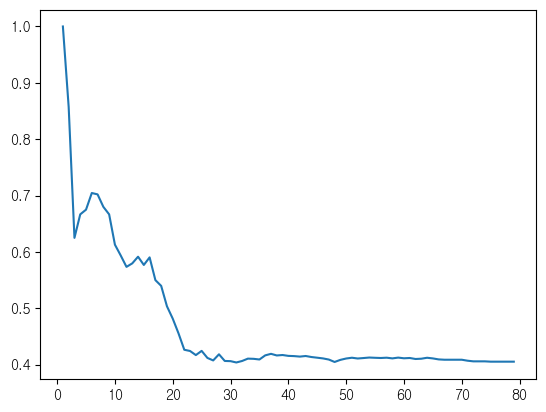

In [76]:
multi_age_range = [titanic[titanic.Age<i].Survived.mean() for i in range(1,80)]
plt.plot(range(1,80), multi_age_range)
plt.show()